In [73]:
from scipy.spatial import distance

In [420]:
import os,csv,json
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
import tifffile as tif

In [344]:
trainingfolder = '/home/emilyjanedennis/Desktop/training_inputs'
rawfolder = os.path.join(trainingfolder,"raw")
# for each file want all the associated files
# either need to use the index or use the base name


In [181]:
# only have to do this once
# make rois into np arrays
roifolder = os.path.join(trainingfolder,"rois")
roilist = os.listdir(roifolder)

for folder in roilist:
    filesinfolder = os.listdir(os.path.join(roifolder,folder))
    rois=[]
    for element in range(0,np.size(filesinfolder)):
        fullnm = filesinfolder[element]
        z=int(fullnm[0:4])
        y=int(fullnm[5:9])
        x=int(fullnm[10:14])
        rois.append([z,y,x])
    np.save(os.path.join(trainingfolder,"rois_as_npy/{}_rois.npy".format(folder[0:-6])),rois)
    
    

IndexError: list assignment index out of range

In [345]:
listoffiles = os.listdir(rawfolder)
numfiles = np.size(listoffiles)
listoffiles

['z266stackstart250_ejd_cells_raw.npy',
 'z266stackstart250_cells_raw.npy',
 'z269stackstart475_ejd_cells_raw.npy',
 'z266stackstart180_set2_ejd_cells_raw.npy',
 'z269stackstart500_set2_ejd_cells_raw.npy',
 'z268stackstart310_set2_ejd_cells_raw.npy',
 'z266stackstart420_set2_ejd_cells_raw.npy',
 'z266stackstart350_cells_raw.npy',
 'z266stackstart150_cells_raw.npy',
 'z266stackstart350_ejd_cells_raw.npy']

In [513]:
alldf = pd.DataFrame(columns=['name','sz1','sz2','source','tp','fp','fn','p','r','f1'])

for file in os.listdir(rawfolder):
    rawdata = np.load(os.path.join(rawfolder,file))
    xs =[]
    ys=[]
    zs=[]
    rawrois=[]
    for val in range(0,np.size(rawdata)-1):
        z=rawdata[val][0]
        y=rawdata[val][1]
        x=rawdata[val][2]
        rawrois.append([z,y,x])


        #load and reformat annotated rois
    rois=np.load(os.path.join(trainingfolder,"rois_as_numpy/{}_rois.npy".format(file[0:-14])))
    print(os.path.join(trainingfolder,"rois_as_numpy/{}_rois.npy".format(file[0:-14])))
    annotatedrois=[()]
    for l in range(0,np.shape(rois)[0]):
        vals = rois[l][0], rois[l][1], rois[l][2]
        annotatedrois.append(vals)
    anns = annotatedrois[1:]

    # set iters you want -- should move this out of loop and to the top 
    sizes = np.arange(10,100,5)
    sizes2 = np.arange(40,140,5)
    alldata=[()]
    # for this iter
    for sz in sizes:
        for sz2 in sizes2:
            size = (sz,sz2)
                #set thresholds
            thresholds = {    
                 'source' : 3,
                'size'   : size}
             #filter cells using defined below (need to import later, but had changed so source/sink = just sink)
            filtd = filter_cells(source = np.load(os.path.join(rawfolder,file)), 
                       thresholds=thresholds);
            filtereddata=[()]
            #reformat filtered data this is hacky and because I'm being lazy, to change
            for l in range(0,np.size(filtd)):
                z, y, x, toss, toss2 = filtd[l]
                vals = x, y, z
                filtereddata.append(vals)
            filt = filtereddata[1:]
            #compare filt to ann
            if filt:
                paired, tp, fp, fn = pairwise_distance_metrics(anns,filt,cutoff=30,verbose=False)
                # add output to other outputs
                precision = tp/(tp+fp)
                recall = tp/(tp+fn)
                f1 = 2*((precision*recall)/(precision+recall))
                datatoadd = file[0:-14], sz, sz2, source, tp, fp, fn, round(precision,2), round(recall,2), round(f1,2)
                alldata.append(datatoadd)
    # when all loops are done, save
    placetosave = os.path.join(trainingfolder,"{}_filt_outputs.npy".format(file[0:-14]))
    np.save(placetosave,alldata)
    df = pd.DataFrame(alldata,columns=['name','sz1','sz2','source','tp','fp','fn','p','r','f1'])
    alldf = pd.concat([alldf,df])

/home/emilyjanedennis/Desktop/training_inputs/rois_as_numpy/z266stackstart250_ejd_rois.npy
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past 

/home/emilyjanedennis/anaconda3/envs/ClearMap/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted


got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted


got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted


got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
/home/emilyjanedennis/Desktop/training_inputs/rois_as_numpy/z266stackstart420_set2_ejd_rois.npy
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got 

got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted


got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted
got past zip
sorted


In [516]:
alldf.to_csv('/home/emilyjanedennis/Desktop/training_inputs/test.csv')

ValueError: No objects to concatenate

[(),
 [(),
  ('z266stackstart250', 10, 40, 3, 221, 116, 13, 0.66, 0.94, 0.77),
  ('z266stackstart250', 10, 45, 3, 227, 142, 7, 0.62, 0.97, 0.75),
  ('z266stackstart250', 10, 50, 3, 231, 173, 3, 0.57, 0.99, 0.72),
  ('z266stackstart250', 10, 55, 3, 233, 194, 1, 0.55, 1.0, 0.7),
  ('z266stackstart250', 10, 60, 3, 233, 216, 1, 0.52, 1.0, 0.68),
  ('z266stackstart250', 10, 65, 3, 233, 236, 1, 0.5, 1.0, 0.66),
  ('z266stackstart250', 10, 70, 3, 233, 251, 1, 0.48, 1.0, 0.65),
  ('z266stackstart250', 10, 75, 3, 234, 266, 0, 0.47, 1.0, 0.64),
  ('z266stackstart250', 10, 80, 3, 234, 277, 0, 0.46, 1.0, 0.63),
  ('z266stackstart250', 10, 85, 3, 234, 293, 0, 0.44, 1.0, 0.61),
  ('z266stackstart250', 10, 90, 3, 234, 300, 0, 0.44, 1.0, 0.61),
  ('z266stackstart250', 10, 95, 3, 234, 311, 0, 0.43, 1.0, 0.6),
  ('z266stackstart250', 10, 100, 3, 234, 328, 0, 0.42, 1.0, 0.59),
  ('z266stackstart250', 10, 105, 3, 234, 343, 0, 0.41, 1.0, 0.58),
  ('z266stackstart250', 10, 110, 3, 234, 351, 0, 0.4, 1.0, 0.5

/home/emilyjanedennis/Desktop/training_inputs/rois_as_numpy/z266stackstart250_ejd_rois.npy

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 97, FP: 0, FN: 227

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 167, FP: 4, FN: 157

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 215, FP: 12, FN: 109

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 242, FP: 28, FN: 82

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 266, FP: 42, FN: 58

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 282, FP: 55, FN: 42

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 297, FP: 72, FN: 27

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 306, FP: 98, FN: 18

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 311, FP: 116, FN: 13

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 316, FP: 133, FN: 8

Calcula


Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 175, FP: 1, FN: 149

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 191, FP: 1, FN: 133

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 202, FP: 1, FN: 122

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 217, FP: 2, FN: 107

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 224, FP: 2, FN: 100

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 233, FP: 4, FN: 91

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 247, FP: 7, FN: 77

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 261, FP: 8, FN: 63

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 268, FP: 9, FN: 56

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 272, FP: 10, FN: 52

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 32, FP: 0, FN: 292

Calculating pa


Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 35, FP: 0, FN: 289

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 50, FP: 0, FN: 274

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 58, FP: 0, FN: 266

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 63, FP: 0, FN: 261

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 11, FP: 0, FN: 313

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 28, FP: 0, FN: 296

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 43, FP: 0, FN: 281

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 51, FP: 0, FN: 273

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 56, FP: 0, FN: 268

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 17, FP: 0, FN: 307

Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 32, FP: 0, FN: 292

Calculating pairwise

/home/emilyjanedennis/anaconda3/envs/ClearMap/lib/python3.7/site-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


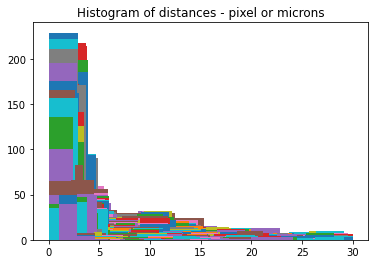

In [469]:
alldata

[(),
 ('z266stackstart250_ejd', 10, 15, 3, 97, 0, 227, 1.0, 0.3, 0.46),
 ('z266stackstart250_ejd', 10, 20, 3, 167, 4, 157, 0.98, 0.52, 0.67),
 ('z266stackstart250_ejd', 10, 25, 3, 215, 12, 109, 0.95, 0.66, 0.78),
 ('z266stackstart250_ejd', 10, 30, 3, 242, 28, 82, 0.9, 0.75, 0.81),
 ('z266stackstart250_ejd', 10, 35, 3, 266, 42, 58, 0.86, 0.82, 0.84),
 ('z266stackstart250_ejd', 10, 40, 3, 282, 55, 42, 0.84, 0.87, 0.85),
 ('z266stackstart250_ejd', 10, 45, 3, 297, 72, 27, 0.8, 0.92, 0.86),
 ('z266stackstart250_ejd', 10, 50, 3, 306, 98, 18, 0.76, 0.94, 0.84),
 ('z266stackstart250_ejd', 10, 55, 3, 311, 116, 13, 0.73, 0.96, 0.83),
 ('z266stackstart250_ejd', 10, 60, 3, 316, 133, 8, 0.7, 0.98, 0.82),
 ('z266stackstart250_ejd', 10, 65, 3, 317, 152, 7, 0.68, 0.98, 0.8),
 ('z266stackstart250_ejd', 10, 70, 3, 319, 165, 5, 0.66, 0.98, 0.79),
 ('z266stackstart250_ejd', 10, 75, 3, 320, 180, 4, 0.64, 0.99, 0.78),
 ('z266stackstart250_ejd', 10, 80, 3, 322, 189, 2, 0.63, 0.99, 0.77),
 ('z266stackstart250

NameError: name 'filtered' is not defined


Calculating pairwise distances...
got past zip
Sorting...
sorted
TP: 5, FP: 166, FN: 319


(324, 3)
(171, 3)


In [399]:

def pairwise_distance_metrics_given_cdists(
        ground_truth, predicted, y, cutoff=10, verbose=True):
    """
    Function to calculate the pairwise distances
    between two lists of zyx points.

    Inputs:
    -------
    ground_truth, predicted: each iterable
    consisting of ndimensional coordinates.
    y: matrix of distances between all
    elements of ground truth and predicted

    Returns:
    -------
    paired: list of [ground_truth"s index
    (from input list), predicted"s index (from input list), distance]
    tp,fp,fn: statistics on true positives,
    false positives, and false negatives.
    """
    # only keep those distances that are below the cutoff!
    truth_indices, pred_indices = np.where(y <= cutoff)
    dists = zip(y[truth_indices, pred_indices], truth_indices, pred_indices)

    # sort by smallest dist
    if verbose:
    dists = sorted(dists, key=lambda x: x[0])

    used_truth = set()
    used_pred = set()
    paired = []
    for (i, dist) in enumerate(dists):
        d = dist[0]
        if d > cutoff:
            # we have reached distances beyond the cutoff
            break
        truth_idx = dist[1]
        pred_idx = dist[2]
        if truth_idx not in used_truth and pred_idx not in used_pred:
            paired.append((truth_idx, pred_idx, d))
            used_truth.add(truth_idx)
            used_pred.add(pred_idx)
        if len(used_truth) == len(ground_truth) or len(used_pred) == len(predicted):
            # we have used up all the entries from the shorter list
            break

    tp = len(paired)
    fn = len(ground_truth) - len(paired)
    fp = len(predicted) - len(paired)
    if verbose:
        print("TP: {}, FP: {}, FN: {}".format(tp, fp, fn))
    # print(paired)

    if verbose:
       plt.hist([xx[2] for xx in paired], bins=np.max((int(len(paired)/500), 10)))
       plt.title("Histogram of distances - pixel or microns")

    return paired, tp, fp, fn

In [144]:
def filter_cells(source, thresholds):
  """Filter a array of detected cells according to the thresholds.
  
  Arguments
  ---------
  source : str, array or Source
    The source for the cell data.
  sink : str, array or Source
    The sink for the results.
  thresholds : dict
    Dictionary of the form {name : threshold} where name refers to the 
    column in the cell data and threshold can be None, a float 
    indicating a minimal threshold or a tuple (min,max) where min,max can be
    None or a minimal and maximal threshold value.
  
  Returns
  -------
  sink : str, array or Source
    The thresholded cell data.
  """
  
  ids = np.ones(source.shape[0], dtype=bool);
  for k,t in thresholds.items():
    if t:
      if not isinstance(t, (tuple, list)):
        t = (t, None);
      if t[0] is not None:
        ids = np.logical_and(ids, t[0] <= source[k])
      if t[1] is not None:
        ids = np.logical_and(ids, t[1] > source[k]);
  cells_filtered = source[ids];
  return cells_filtered


In [334]:
def pairwise_distance_metrics(ground_truth, predicted, cutoff=10, verbose=True):
    """
    Function to calculate the pairwise distances
    between two lists of zyx points.

    Inputs:
    -------
    ground_truth, predicted: each iterable consisting of
    ndimensional coordinates.

    Returns:
    -------
    paired: list of [ground_truth"s index (from input list),
    predicted"s index (from input list), distance]
    tp,fp,fn: statistics on true positives, false positives,
    and false negatives.
    """

    if verbose:
        print("\nCalculating pairwise distances...")
    y = distance.cdist(ground_truth, predicted, metric="euclidean")
    return pairwise_distance_metrics_given_cdists(
       ground_truth, predicted, y, cutoff, verbose)